In [14]:
# Standard libraries
import os
import glob
import warnings
import gc

# Data manipulation and analysis libraries
import numpy as np
import pandas as pd
import dask.dataframe as dd
import dask.array as da
import xarray as xr
import geopandas as gpd
from shapely.geometry import Point
from netCDF4 import Dataset
# geopandas 
from shapely.geometry import Point
import geopandas as gpd

# Dask diagnostics and progress bar
from dask.diagnostics import ProgressBar

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import cartopy.crs as ccrs
from pylag.processing.plot import FVCOMPlotter, create_figure, colourmap

In [20]:
base_path = r'/mnt/d/Users/abolmaal/Arcgis/NASAOceanProject'

outDb = os.path.join(base_path, 'ZonalStats')

coastal_watersheds_path = r'/mnt/d/Users/abolmaal/Arcgis/NASAOceanProject/GIS_layer/CoastalWatersheds/Erase_Lake'
# Define the path to the FVCOM grid metrics file
grid_metrics_file_name = r'/home/abolmaal/modelling/FVCOM/Huron/input/gridfile/grid_metrics_huron_senseflux_Seasonal.nc'

In [13]:
output_figures = '/home/abolmaal/modelling/FVCOM/Huron/figures/2024'


In [5]:
dfCoastalWatershed_avg = pd.read_csv(os.path.join(outDb, 'CoastalWatershed_total_N_P_avg.csv'))
dfCoastalWatershed_low = pd.read_csv(os.path.join(outDb, 'CoastalWatershed_total_N_P_low.csv'))
dfCoastalWatershed_high = pd.read_csv(os.path.join(outDb, 'CoastalWatershed_total_N_P_high.csv'))
dfCoastalWatershed_surge = pd.read_csv(os.path.join(outDb, 'CoastalWatershed_total_N_P_surge.csv'))

In [3]:
inCoastalWatershed_low = os.path.join(coastal_watersheds_path,'CoastalWatershed_low_erase_lakedrain_LakeHuron.shp')
inCoastalWatershed_high = os.path.join(coastal_watersheds_path,'CoastalWatershed_high_erase_lakedrain_LakeHuron.shp')
inCoastalWatershed_avg = os.path.join(coastal_watersheds_path, 'CoastalWatershed_avg_erase_lakedrain_LakeHuron.shp')
inCoastalWatershed_surge = os.path.join(coastal_watersheds_path,'CoastalWatershed_surge_erase_lakedrain_LakeHuron.shp')


# read the shapefiles
gdfCoastalWatershed_low = gpd.read_file(inCoastalWatershed_low)
gdfCoastalWatershed_high = gpd.read_file(inCoastalWatershed_high)
gdfCoastalWatershed_avg = gpd.read_file(inCoastalWatershed_avg)
gdfCoastalWatershed_surge = gpd.read_file(inCoastalWatershed_surge)

In [6]:
# Ensure both Coastal_id columns are strings
gdfCoastalWatershed_avg["Coastal_id"] = gdfCoastalWatershed_avg["Coastal_id"].astype(str)
dfCoastalWatershed_avg["Coastal_id"] = dfCoastalWatershed_avg["Coastal_id"].astype(str)

In [7]:
# Merge on 'Coastal_id' (or your shared ID column)
merge_dfCoastalWatershed_avg = gdfCoastalWatershed_avg.merge(
    dfCoastalWatershed_avg, on="Coastal_id", how="left"
)

In [8]:
# remove the NAN values in merge_dfCoastalWatershed_avg
merge_dfCoastalWatershed_avg_clean = merge_dfCoastalWatershed_avg.dropna()
merge_dfCoastalWatershed_avg_clean

,Id,gridcode,Coastal_id,cent_lat,cent_lon,Shape_Area_x,geometry,Shape_Area_y,CoastalWatershedDirectTN_avg_kgday,CoastalWatershedDirectTP_avg_kgday,CoastalWatershedDirectTN_avg_grm2yr,CoastalWatershedDirectTP_avg_grm2yr
1,2,2,2,45.559242,-84.129044,240307,"MULTIPOLYGON (((1025648.625 998907.949, 102573...",240307.0,0.001673,0.001673,0.002541,0.002541
8,14,24,14,45.496987,-84.101583,10000,"POLYGON ((1027698.625 992120.378, 1027698.625 ...",10000.0,0.000442,0.000442,0.016122,0.016122
18,32,53,32,45.492235,-84.033030,150387,"POLYGON ((1033198.625 991670.378, 1033248.625 ...",150387.0,0.006932,0.006932,0.016824,0.016824
19,33,58,33,45.491444,-84.010945,42978,"POLYGON ((1034848.625 991577.516, 1034848.625 ...",42978.0,0.000394,0.000394,0.003347,0.003347
20,34,67,34,45.491457,-83.976654,148190,"POLYGON ((1037548.625 991670.378, 1037548.625 ...",148190.0,0.001385,0.001385,0.003410,0.003410
...,...,...,...,...,...,...,...,...,...,...,...,...
8205,12223,17922,10160,41.728142,-83.499739,392500,"POLYGON ((1079648.625 573170.378, 1079648.625 ...",392500.0,0.026406,0.026406,0.024556,0.024556
8206,12224,18008,10161,41.724004,-83.491974,47500,"POLYGON ((1080248.625 572920.378, 1080348.625 ...",47500.0,0.009584,0.009584,0.073645,0.073645
8207,12225,17997,10162,41.723408,-83.489902,15000,"POLYGON ((1080348.625 572720.378, 1080348.625 ...",15000.0,0.000402,0.000402,0.009780,0.009780
8210,12228,18015,10165,41.723584,-83.481525,77500,"POLYGON ((1081048.625 572870.378, 1081348.625 ...",77500.0,0.002618,0.002618,0.012329,0.012329


In [10]:
import numpy as np

merge_dfCoastalWatershed_avg_clean["CoastalWatershedDirectTN_avg_kgday_log_TN"] = np.log10(
    merge_dfCoastalWatershed_avg_clean["CoastalWatershedDirectTN_avg_kgday"] + 1e-6
)

/root/miniforge3/envs/pylag/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
def plot_wetload_distribution_TN_with_three_insets(
    merged_data, 
    grid_metrics_file_name, 
    main_extents, 
    zoom_extents_1, 
    zoom_extents_2, 
    zoom_extents_3, 
    color_map, 
    font_size=15, 
    title=None,
    inset_position_1=[0.30, 0.50, 0.25, 0.25],  # [left, bottom, width, height]
    inset_position_2=[0.1, 0.40, 0.18, 0.18],   # [left, bottom, width, height]
    inset_position_3=[0.50, 0.25, 0.18, 0.18],  # [left, bottom, width, height]
    colorbar_outside=True,
    vmin=None,
    vmax=None
):
    """
    Creates a hexbin plot showing the WetLoad_TN_kg2 concentration in coastal wetlands with bathymetry background,
    with three zoomed-in maps inside or near the main map. 
    Each zoom-in region is enclosed with a colored box that matches the zoomed-in map's title color.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    from netCDF4 import Dataset
    import cartopy.crs as ccrs

    # Collect coordinates and WetLoad_TN_kg2 data for plotting
    all_coords = np.array(list(zip(merged_data['cent_lon'], merged_data['cent_lat'])))
    wetload_tn = merged_data['CoastalWatershedDirectTN_avg_grm2yr'].values

    # Create the figure and main axis
    fig, ax_main = plt.subplots(figsize=(26., 26.), subplot_kw={'projection': ccrs.PlateCarree()})
    fig.suptitle(title if title else 'Direct Annual Nitrogen Load to Coastal Wetlands', fontsize=font_size + 5)

    # Load bathymetry data from NetCDF
    with Dataset(grid_metrics_file_name, 'r') as ds:
        bathy = -ds.variables['h'][:]

    # Configure plotter for bathymetry
    plotter = FVCOMPlotter(grid_metrics_file_name, geographic_coords=True, font_size=font_size)

    # Plot the main extent
    ax_main, plot_main = plotter.plot_field(
        ax_main, bathy, extents=main_extents, add_colour_bar=True, cb_label='Depth(m)', 
        vmin=-60., vmax=0., cmap='Blues', zorder=0
    )
    plotter.draw_grid(ax_main, linewidth=0.5)

    # Hexbin plot with optional vmin and vmax for the colorbar range
    hb_main = ax_main.hexbin(
        all_coords[:, 0], 
        all_coords[:, 1], 
        C=wetload_tn, 
        gridsize=50, 
        cmap=color_map, 
        norm=LogNorm(),
        reduce_C_function=np.sum, 
        zorder=40, 
        vmin=vmin,
        vmax=vmax
    )

    # Add color bar for main extent
    if colorbar_outside:
        cbar_main = fig.colorbar(hb_main, ax=ax_main, pad=0.1)
    else:
        cbar_main = fig.colorbar(hb_main, ax=ax_main, shrink=0.8, location="right", pad=0.15)

    cbar_main.set_label('Nitrogen Load (g/m²/year)', fontsize=font_size + 5)
    cbar_main.ax.tick_params(labelsize=font_size + 2)

    ax_main.set_xlabel('Longitude', fontsize=font_size)
    ax_main.set_ylabel('Latitude', fontsize=font_size)

    if vmin is not None or vmax is not None:
        cbar_main.set_clim(vmin, vmax)

    inset_positions = [inset_position_1, inset_position_2, inset_position_3]
    zoom_extents = [zoom_extents_1, zoom_extents_2, zoom_extents_3]
    colors = ['red', 'blue', 'green']

    for i, (inset_pos, zoom_extent, color) in enumerate(zip(inset_positions, zoom_extents, colors)):
        ax_inset = plt.axes(inset_pos, projection=ccrs.PlateCarree())
        ax_inset.set_extent(zoom_extent, crs=ccrs.PlateCarree())

        ax_inset, plot_zoom = plotter.plot_field(
            ax_inset, bathy, extents=zoom_extent, add_colour_bar=False, cb_label=None, 
            vmin=-60., vmax=0., cmap='Blues', zorder=0
        )
        plotter.draw_grid(ax_inset, linewidth=0.5)

        hb_zoom = ax_inset.hexbin(
            all_coords[:, 0], 
            all_coords[:, 1], 
            C=wetload_tn, 
            gridsize=50, 
            cmap=color_map, 
            norm=LogNorm(),
            reduce_C_function=np.sum, 
            zorder=40, 
            vmin=vmin,
            vmax=vmax
        )

        ax_inset.set_title(f"Enlarge view {i+1}", fontsize=font_size - 4, color=color, fontweight='bold')

        rect = plt.Rectangle(
            (zoom_extent[0], zoom_extent[2]),
            zoom_extent[1] - zoom_extent[0],
            zoom_extent[3] - zoom_extent[2],
            linewidth=2, edgecolor=color, facecolor='none', 
            transform=ccrs.PlateCarree(), zorder=50
        )
        ax_main.add_patch(rect)

        inset_box = plt.Rectangle(
            (inset_pos[0], inset_pos[1]),
            inset_pos[2],
            inset_pos[3],
            linewidth=3, edgecolor=color, facecolor='none', linestyle='-', zorder=60
        )
        ax_main.add_patch(inset_box)

    plt.savefig(output_figures + '/DirectNitrogenLoad_CoastalWatershed_gperm2peryear.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_48124/2198589163.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


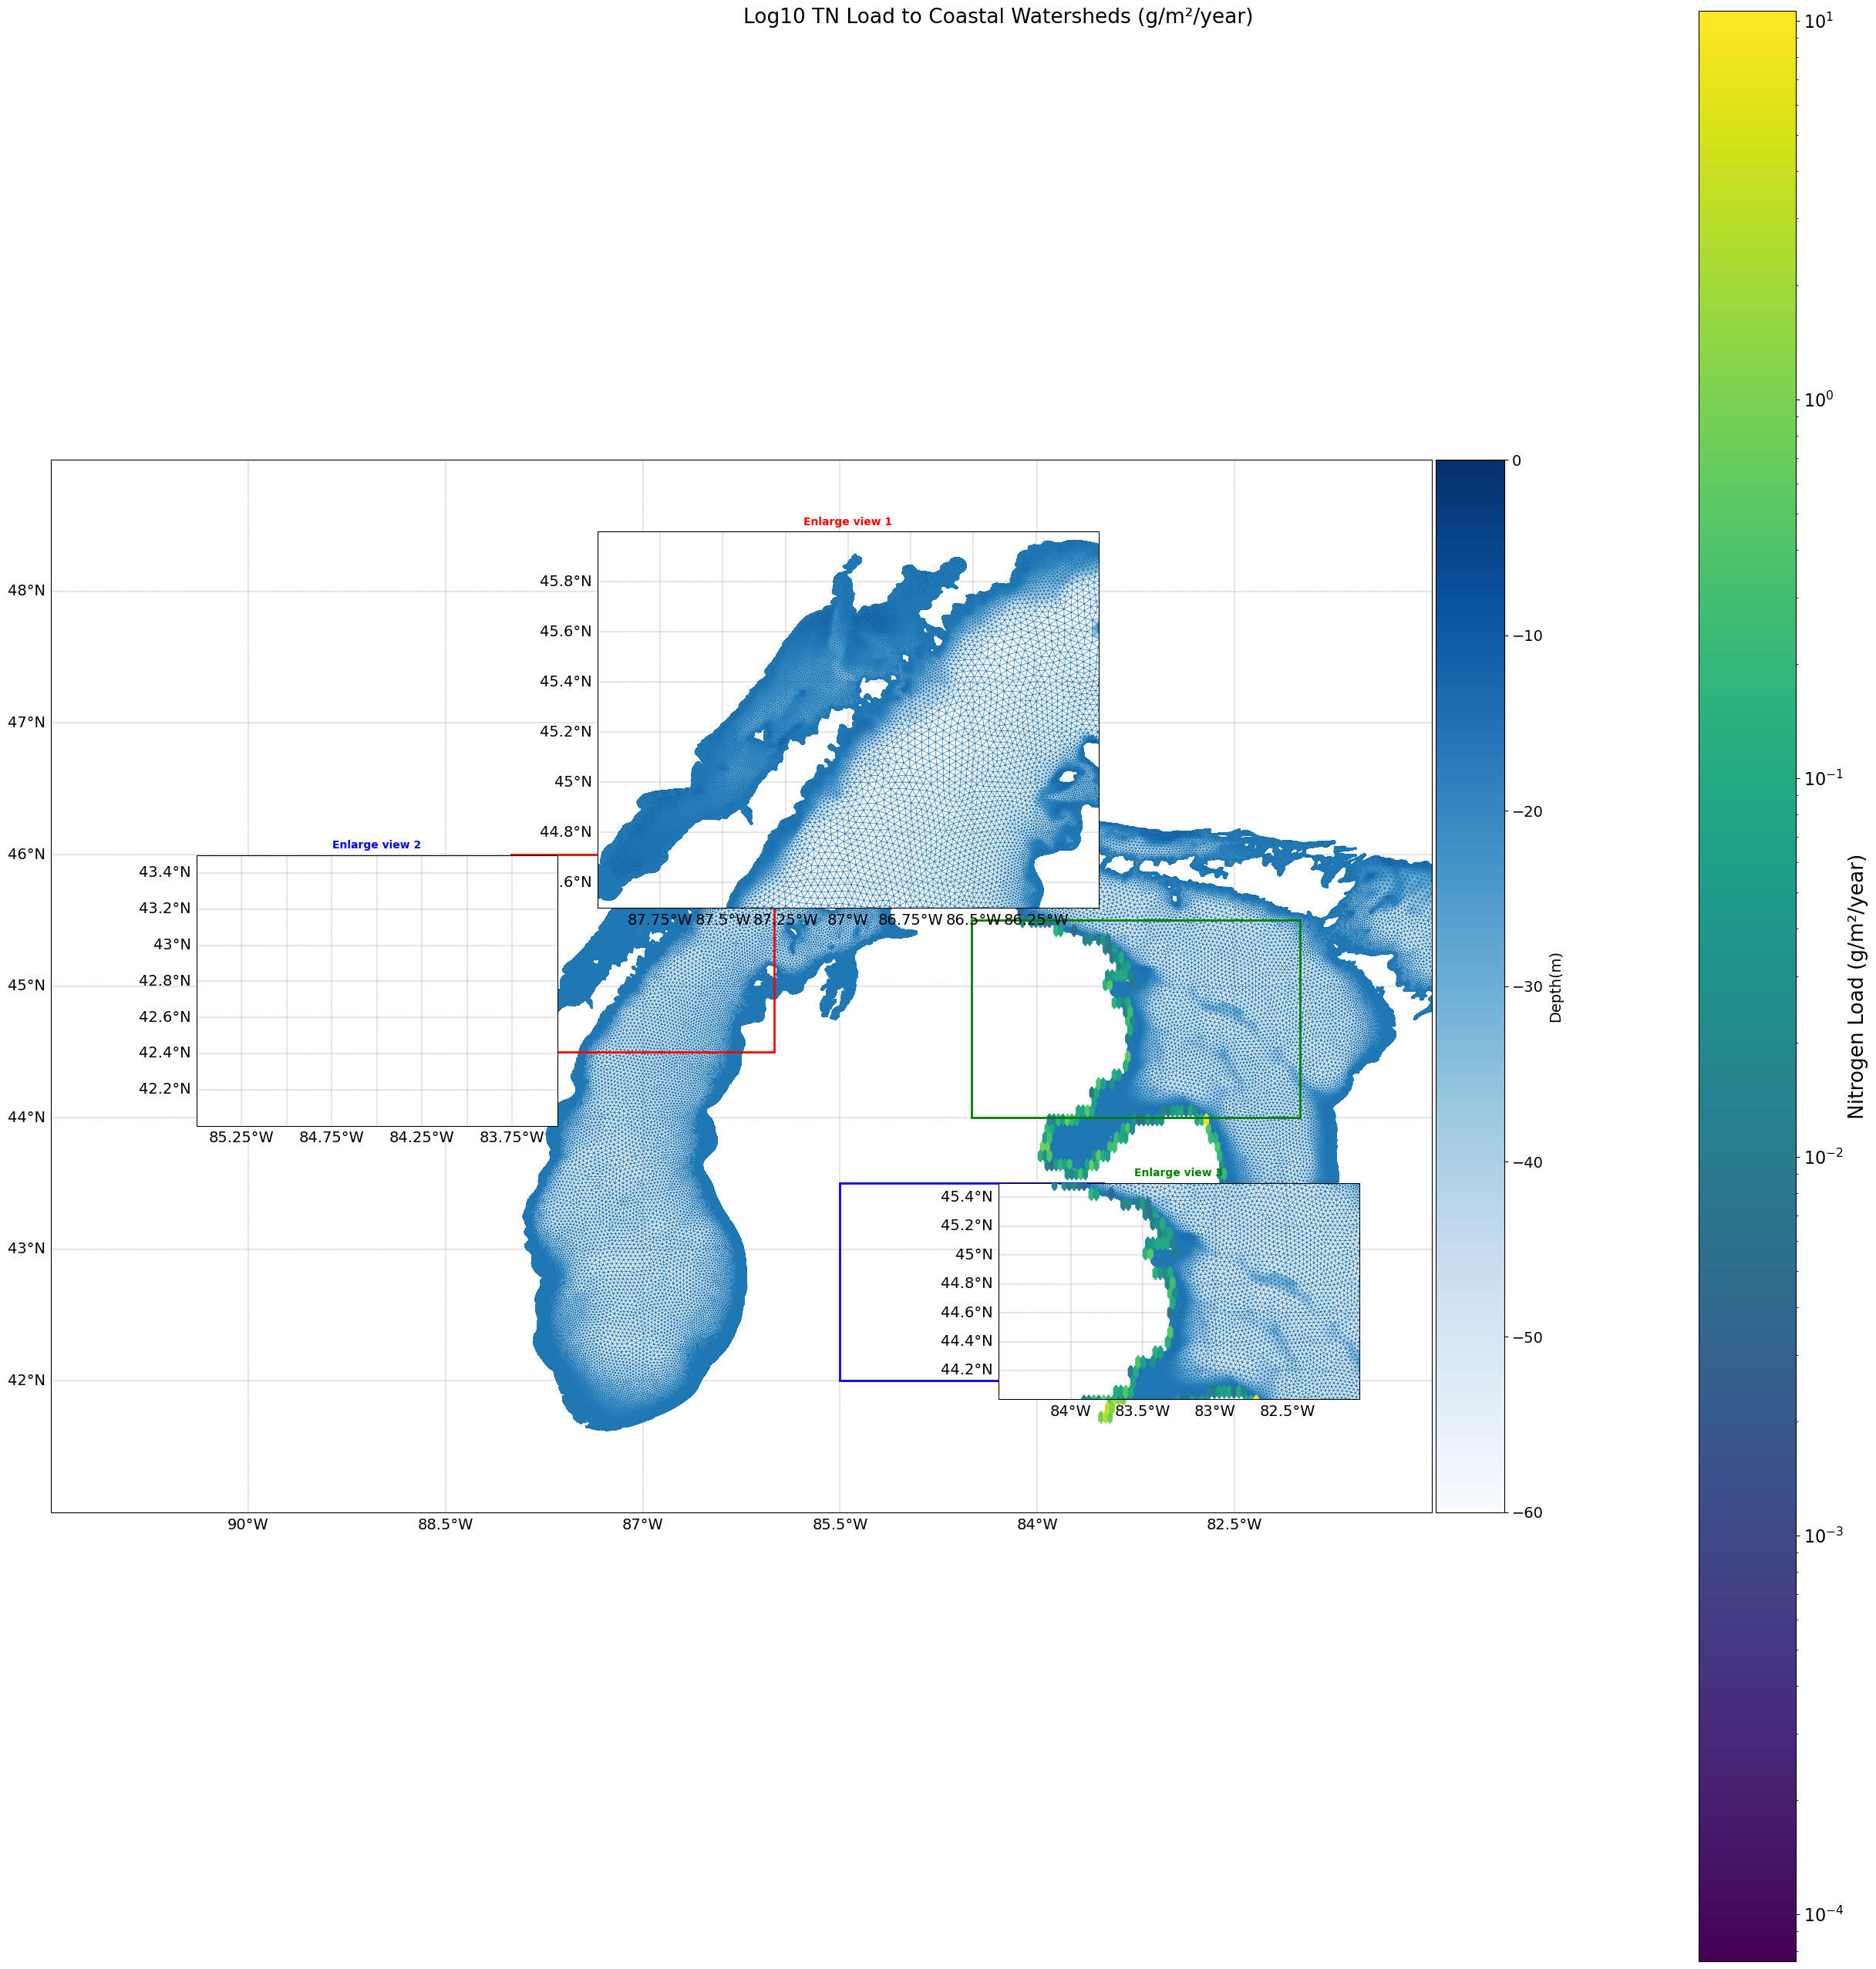

In [23]:
plot_wetload_distribution_TN_with_three_insets(
    merged_data=merge_dfCoastalWatershed_avg_clean,
    grid_metrics_file_name=grid_metrics_file_name,
    main_extents=[-91.5, -81.0, 41.0, 49.0],  # Example: bounding box for Great Lakes
    zoom_extents_1=[-88.0, -86.0, 44.5, 46.0],
    zoom_extents_2=[-85.5, -83.5, 42.0, 43.5],
    zoom_extents_3=[-84.5, -82.0, 44.0, 45.5],
    color_map='viridis',
    font_size=14,
    title='Log10 TN Load to Coastal Watersheds (g/m²/year)',

)
